# Week 7: Regression

In [46]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Great content about what to be careful about in linear regression modeling
# https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

## Day 2: Nonlinear Regression and Model Assessment
Today we take a closer look at cases when the linear model does not apply. Further, we talk about how to assess the model using machine learning approach to the process.

### Example 1: fake linear relationship
A substance is slowly dissolving in acid. The data in `acid_solution.csv` contains measurements of the time (in minutes) after the start of the process, and percent of the substance that has dissolved by that time.
Is there evidence that there is a linear relationship between time passed and the percent of dissolved substance?

In [3]:
# Load data
df = pd.read_csv('acid_solution.csv')
df.head()

,time,percent_dissolved
0,1.0,0.68
1,1.1,1.14
2,1.2,1.72
3,1.3,1.59
4,1.4,1.75


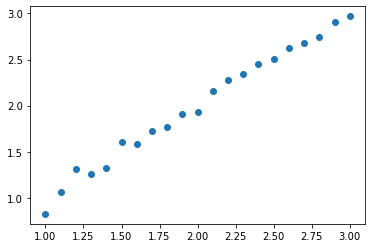

<AxesSubplot:xlabel='time', ylabel='percent_dissolved'>

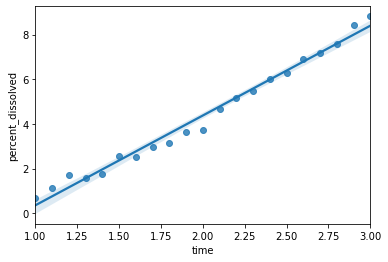

In [31]:
X = df['time'].to_numpy()
y = np.sqrt(df['percent_dissolved'].to_numpy())

plt.figure()
plt.scatter(X, y)
plt.show()

sns.regplot(data=df, x='time', y='percent_dissolved')

r-sq =  0.9895248411557653


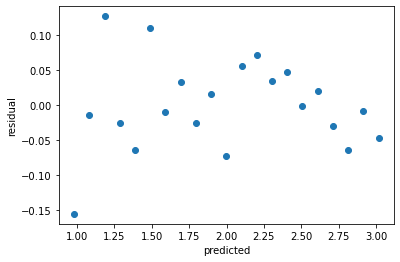

In [32]:
# Build the model
lin_model = LinearRegression()
X = X.reshape(-1, 1) #rehapeing into a vector-column

lin_model.fit(X, y)

y_pred = lin_model.predict(X)

resid = y - y_pred

r_sq = lin_model.score(X, y)

print('r-sq = ', r_sq)

#make a residual plot
plt.figure()
plt.scatter(y_pred, resid)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

r-sq =  0.9965249742113663


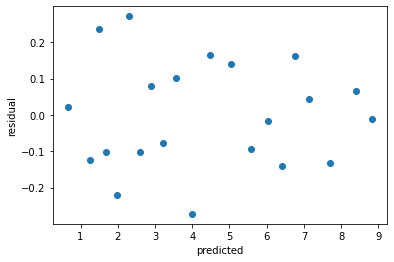

In [27]:
# Fittina a nonlinear model
from sklearn.preprocessing import PolynomialFeatures

# Instance the transformer, transform the data
trans = PolynomialFeatures(degree=9)

trans.fit(X)
X_trans = trans.transform(X) # X_trans = trans.fit_transform(X)
X_trans

# Build the model
quad_model = LinearRegression().fit(X_trans, y)

y_pred_quad = quad_model.predict(X_trans)
resid_quad = y - y_pred_quad

r_sq_quad = quad_model.score(X_trans, y)

print('r-sq = ', r_sq_quad)

#make a residual plot
plt.figure()
plt.scatter(y_pred_quad, resid_quad)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

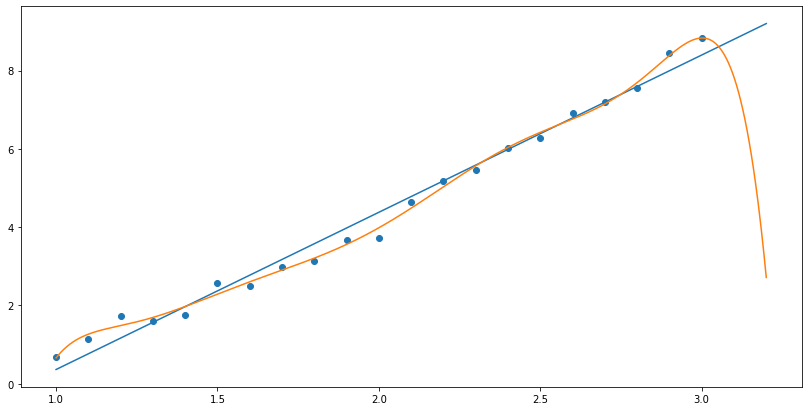

In [30]:
# Plot the two models
xs = np.linspace(1, 3.2, 1000)
ys_lin = lin_model.predict(xs.reshape(-1, 1))

xs_trans = trans.transform(xs.reshape(-1, 1))
ys_quad = quad_model.predict(xs_trans)

plt.figure(figsize=(14, 7))
plt.scatter(df['time'], df['percent_dissolved'])
plt.plot(xs, ys_lin)
plt.plot(xs, ys_quad)
plt.show()

### Comparing models: an ML approach
In ML the approach to testing the model performance is generally independent of the statistical measures. The following approach is frequently taken:
* Split the original data into two sets: a train set and a test set. The test set is 20%-30% of the size of the original data set
* Build/Train the model on the train set only
* Test the model on the test set only. Frequent *metrics* for this include:
    * **Mean Absolute Error (MAE)** $\displaystyle \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left|\, \text{obs} - \text{pred} \,\right|$
    * **Mean Squared Error (MSE)** $\displaystyle \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( \text{obs} - \text{pred} \right)^2$
    * **Root Mean Squared Error (RMSE)** $\displaystyle \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \text{obs} - \text{pred} \right)^2}$
    
### Example 2
The data given in `final_score.csv` contain information about the scores of a group of students in a statistics course.
* Split the original data into train and test sets. The test set should be 30% of the total data
* Build a linear model for the `final` using all available features
* By considering the `pairplot`, remove the least important feature, and build a second model without that feature
* Compare the performance of the two models using MAE, MSE and RMSE

In [47]:
# Load sklearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv('final_score.csv')
X = df[['test_1', 'test_2', 'project', 'homework']].to_numpy()
#X = df[['test_1', 'test_2', 'homework']].to_numpy()
y = df['final']

#print(df.columns)
#df

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Build a linear model
#model_1 = LinearRegression().fit(X_train, y_train)
model_1 = Lasso().fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_full = model_1.predict(X_test)

# FOR TRAINING DATA
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('Model with four features: (on the train set)')
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)


#FOR TEST DATA
mae = mean_absolute_error(y_test, y_pred_full)
mse = mean_squared_error(y_test, y_pred_full)
rmse = np.sqrt(mse)
print('\n\nModel with four features: (on the test set)')
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)

print('\n\nr-sq = ', model_1.score(X_train, y_train))

Model with four features: (on the train set)
MAE =  11.597113614398369
MSE =  256.99948708575016
RMSE =  16.031203544517492


Model with four features: (on the test set)
MAE =  15.248305711845765
MSE =  402.4917668214662
RMSE =  20.062197457443844


r-sq =  0.6523061048802746


,final,test_1,test_2,project,homework
final,1.000000,0.716284,0.527751,0.018288,0.633146
test_1,0.716284,1.000000,0.445727,0.064468,0.620585
test_2,0.527751,0.445727,1.000000,-0.048124,0.601441
project,0.018288,0.064468,-0.048124,1.000000,0.026469
homework,0.633146,0.620585,0.601441,0.026469,1.000000


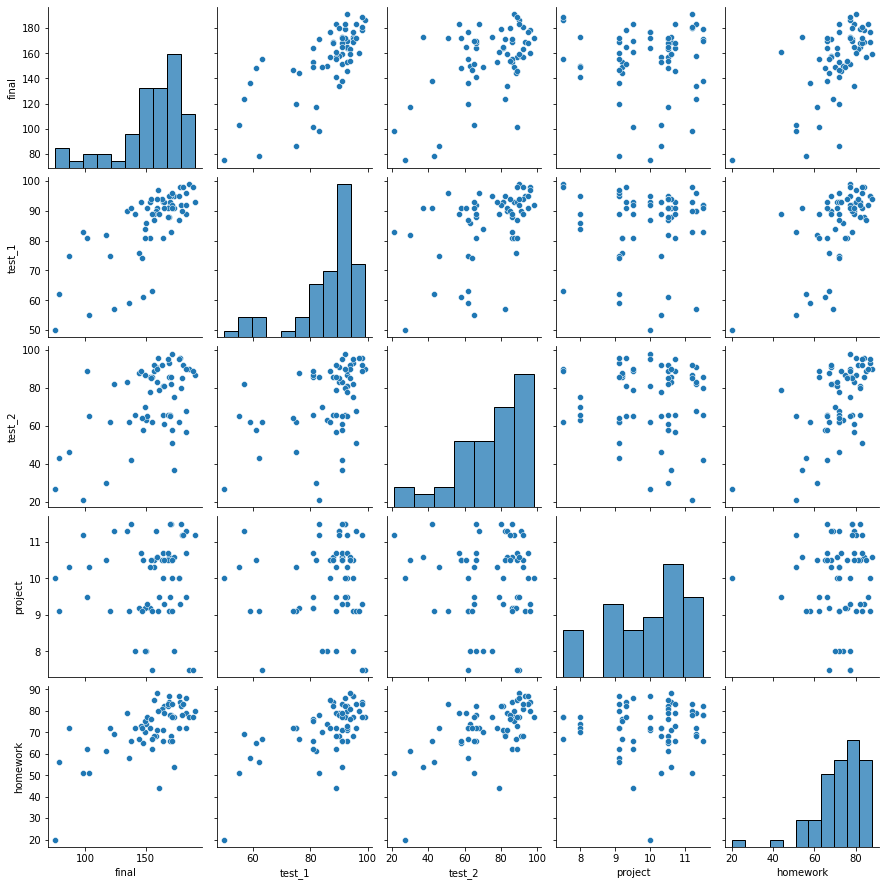

In [41]:
# Identify the least important feature
sns.pairplot(df)

df.corr()

In [42]:
# Build the model with three features
df.corr()**2

,final,test_1,test_2,project,homework
final,1.000000,0.513062,0.278521,0.000334,0.400874
test_1,0.513062,1.000000,0.198672,0.004156,0.385126
test_2,0.278521,0.198672,1.000000,0.002316,0.361731
project,0.000334,0.004156,0.002316,1.000000,0.000701
homework,0.400874,0.385126,0.361731,0.000701,1.000000


In [48]:
df = pd.read_csv('mutual_funds.csv')
df.head()

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88
4,Ariel,DE,46.39,1.03,2-Star,11.32


In [52]:
# Ordinal Coding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

enc_1 = OrdinalEncoder()
enc_1.fit(df['fund_type'].to_numpy().reshape(-1, 1))
df['fund_type_enc'] = enc_1.transform(df['fund_type'].to_numpy().reshape(-1, 1))
df.head()

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return,fund_type_enc
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39,0.0
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53,2.0
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34,1.0
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88,0.0
4,Ariel,DE,46.39,1.03,2-Star,11.32,0.0


In [54]:
enc_2 = OneHotEncoder().fit(df['fund_type'].to_numpy().reshape(-1, 1))
encoded_data = enc_2.transform(df['fund_type'].to_numpy().reshape(-1, 1))
encoded_data.todense() #or use  OneHotEncoder(sparse=False)

matrix([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])